In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

##https://www.kaggle.com/stetelepta/exploring-heart-rate-variability-using-python


In [6]:
df=pd.read_csv(os.getcwd()+'\\respiratorycharting20220427_hour_mask.csv')
df2=pd.read_csv(os.getcwd()+'\\dialysisoffset20220409.csv')
ftname=['patientunitstayid','min','max','median','Respiratory rate mean','Respiratory rate var','std/SDNN','RMSSD','NN50','pNN50(%)','NN20','pNN20(%)']
dfvariability=pd.DataFrame(columns=ftname)
for i in range(0,len(df)):

    variability=[]
    for j in range(1,49):
        if(not pd.isna(df['Respiratory rate %02d hours'%j][i])):
            variability.append(df['Respiratory rate %02d hours'%j][i])
    #print(variability)
    #dfhrv['patientunitstayid'][i]=df['patientunitstayid'][i]
    try:
        space_row = [df2['patientunitstayid'][i]]
        space_row.append(np.nanmin(variability))
        space_row.append(np.nanmax(variability))
        space_row.append(np.nanmedian(variability))
        space_row.append(np.nanmean(variability))
        space_row.append(np.nanvar(variability))
        space_row.append(np.nanstd(variability))
        space_row.append(np.sqrt(np.mean(np.square(np.diff(variability)))))#rmssd 相鄰值平方和的均方根
        space_row.append(np.sum(np.abs(np.diff(variability)) > 50))#nn50
        space_row.append(100 * np.sum((np.abs(np.diff(variability)) > 50)) / len(variability))#pnn50
        space_row.append(np.sum(np.abs(np.diff(variability)) > 20))#nn20
        space_row.append(100 * np.sum((np.abs(np.diff(variability)) > 20)) / len(variability))#pnn20
        #space_row.append(df2['dialysisend'][i]-df2['dialysisstart'][i])
        #space_row.append(df['target'][i])
        #print(df2['patientunitstayid'][i])
        #print(np.nanvar(hrv))
    except ValueError:
        print(df['patientunitstayid'][i])
        space_row=[df2['patientunitstayid'][i]]
        for i in range(1,len(ftname)):
            space_row.append(-0.001)
        #space_row.append(df['target'][i])
    dfvariability = dfvariability.append(pd.Series(space_row, index=dfvariability.columns), ignore_index=True)
dfvariability.to_csv(os.getcwd()+'\\Respiratoryrate20220427.csv',index=False)

255084
315675
319656
336030
342637
360614
371615
377999
395242
395242
395242
403767
403929
410041
410041
411283
418446
975837
975837
1074709
1076751
1078333
1078333
1079849
1081121
1081121
1081121
1081121
1081121
1082319
1082319
1082319
1082332
1082703
1087935
1087935
1087935
1088579
1088579
1088579
1088579
1088579
1088579
1088579
1089861
1091497
1091497
1091497
1091497
1092341
1092341
1094177
1094177
1094177
1095804
1095804
1095804
1095804
1096312
1096912
1097147
1097725
1097725
1097725
1097889
1098492
1099196
1099310
1099310
1100389
1100389
1100888
1102236
1102236
1103426
1103629
1103629
1103682
1104615
1105545
1105545
1105545
1105559
1106936
1110994
1111782
1112177
1112386
1115250
1116364
1116364
1116587
1119039
1121420
1122383
1125193
1125671
1125671
1125857
1125886
1125886
1126256
1126256
1126339
1126887
1126887
1131967
1132290
1132291
1133984
1134278
1138846
1178019
1211498
1318543
1318543
1346369
1347949
1434634
1475852
1477226
1479684
1489198
1493435
1510023
1512837
1516637
152

In [4]:
df=pd.read_csv(os.getcwd()+'\\dialysisoffset20220116.csv')
df2=pd.read_csv(os.getcwd()+'\\inputdata20220406.csv')
pid=[]
droplist=[]
for i in range(0,len(df2)):
    pid.append(df2['patientunitstayid'][i])
for i in range(0,len(df)):
    if(df['patientunitstayid'][i] not in pid):
        droplist.append(df['patientunitstayid'][i])
#df.to_csv(os.getcwd()+'\\respiratorycharting20220111_hour_mask.csv',index=False)

In [7]:
print(len(droplist))
print(7429-7252)

83
177


In [5]:
df=pd.read_csv(os.getcwd()+'\\vitalperiodic20220116exe.csv')
df2=pd.read_csv(os.getcwd()+'\\dialysisoffset20220409.csv')#sao2 systemicsystolic systemicdiastolic heartrate

feature=['heartrate','systemicsystolic','sao2','systemicdiastolic']
for k in range(0,len(feature)):
    ftname=['patientunitstayid','min','max','median','%s mean'%feature[k],'%s var'%feature[k],'std/SDNN','RMSSD','NN50','pNN50(%)','NN20','pNN20(%)','amount']
    dfhrv=pd.DataFrame(columns=ftname)
    print(feature[k])
    for i in range(0,len(df2)):
        hrv=[]
        start=df2['dialysisstart'][i]
        end=df2['dialysisstart'][i]+288
        if(df2['dialysisend'][i]-df2['dialysisstart'][i]<287):
            end=df2['dialysisend'][i]
        for j in range(start,end):
            if(190>=df['%s'%feature[k]][j]>=30 and not pd.isna(df['%s'%feature[k]][j])):
                hrv.append(df['%s'%feature[k]][j])
        #print(hrv)
        #dfhrv['patientunitstayid'][i]=df['patientunitstayid'][i]
        try:
            space_row = [df2['patientunitstayid'][i]]
            space_row.append(np.nanmin(hrv))
            space_row.append(np.nanmax(hrv))
            space_row.append(np.nanmedian(hrv))
            space_row.append(np.nanmean(hrv))
            space_row.append(np.nanvar(hrv))
            space_row.append(np.nanstd(hrv))
            space_row.append(np.sqrt(np.mean(np.square(np.diff(hrv)))))#rmssd 相鄰值平方和的均方根
            space_row.append(np.sum(np.abs(np.diff(hrv)) > 50))#nn50
            space_row.append(100 * np.sum((np.abs(np.diff(hrv)) > 50)) / len(hrv))#pnn50
            space_row.append(np.sum(np.abs(np.diff(hrv)) > 20))#nn20
            space_row.append(100 * np.sum((np.abs(np.diff(hrv)) > 20)) / len(hrv))#pnn20
            space_row.append(df2['dialysisend'][i]-df2['dialysisstart'][i])
            #space_row.append(df['target'][i])
            #print(df2['patientunitstayid'][i])
            #print(np.nanvar(hrv))
        except ValueError:
            #print(df['patientunitstayid'][i])
            space_row=[df2['patientunitstayid'][i]]
            for i in range(1,len(ftname)):
                space_row.append(-0.001)
            #space_row.append(df['target'][i])
        dfhrv = dfhrv.append(pd.Series(space_row, index=dfhrv.columns), ignore_index=True)
    dfhrv.to_csv(os.getcwd()+'\\%s20220427.csv'%feature[k],index=False)

heartrate
systemicsystolic
sao2


c:\users\userpc\miniconda3\envs\243\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\userpc\miniconda3\envs\243\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


systemicdiastolic


In [6]:
print(len(df))

1048575


In [1]:
df=pd.read_csv(os.getcwd()+'\\vitalperiodic20220104exe.csv')
df2=pd.read_csv(os.getcwd()+'\\dialysisoffset20220104filter.csv')
ftname=['patientunitstayid','min','max','median','SaO2 mean','SaO2 var','std/SDNN','RMSSD','NN50','pNN50(%)','NN20','pNN20(%)','amount']
dfhrv=pd.DataFrame(columns=ftname)
i=3197
hrv=[]
for j in range(2814172,2814748):
    if(df['SaO2'][j]>30 and not pd.isna(df['SaO2'][j])):
        hrv.append(df['SaO2'][j])
#dfhrv['patientunitstayid'][i]=df['patientunitstayid'][i]
try:
    space_row = [df2['patientunitstayid'][i]]
    space_row.append(np.nanmin(hrv))
    space_row.append(np.nanmax(hrv))
    space_row.append(np.nanmedian(hrv))
    space_row.append(np.nanmean(hrv))
    space_row.append(np.nanvar(hrv))
    space_row.append(np.nanstd(hrv))
    space_row.append(np.sqrt(np.mean(np.square(np.diff(hrv)))))#rmssd 相鄰值平方和的均方根
    space_row.append(np.sum(np.abs(np.diff(hrv)) > 50))#nn50
    space_row.append(100 * np.sum((np.abs(np.diff(hrv)) > 50)) / len(hrv))#pnn50
    space_row.append(np.sum(np.abs(np.diff(hrv)) > 20))#nn20
    space_row.append(100 * np.sum((np.abs(np.diff(hrv)) > 20)) / len(hrv))#pnn20
    space_row.append(df2['dialysisend'][i]-df2['dialysisstart'][i])
    print(hrv)
    print(len(hrv))
    print(np.nanvar(hrv))
    #space_row.append(df['target'][i])
   # print(np.nanmedian(hrv))
except ValueError:
    print(df['patientunitstayid'][i])
    space_row=[df2['patientunitstayid'][i]]
    for i in range(1,len(ftname)):
        space_row.append(-0.001)
    #space_row.append(df['target'][i])
dfhrv = dfhrv.append(pd.Series(space_row, index=dfhrv.columns), ignore_index=True)
dfhrv.to_csv(os.getcwd()+'\\SaO2 20211228.csv',index=False)

NameError: name 'pd' is not defined

In [17]:
hrv=[140.0, 140.0, 140.0, 140.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 140.0, 140.0, 140.0, 140.0, 140.0, 142.0, 142.0, 144.0, 142.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 84.0, 84.0, 84.0, 84.0, 84.0, 82.0, 82.0, 82.0, 82.0, 80.0, 82.0, 82.0, 84.0, 84.0, 82.0, 82.0, 82.0, 82.0, 80.0, 80.0, 80.0, 80.0, 80.0, 82.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 78.0, 84.0, 86.0, 82.0, 80.0, 80.0, 84.0, 84.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 80.0, 80.0, 80.0, 80.0, 80.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 86.0, 84.0, 82.0, 82.0, 82.0, 80.0, 80.0, 82.0, 82.0, 82.0, 84.0, 84.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 88.0, 86.0, 84.0, 84.0, 88.0, 88.0, 88.0, 84.0, 84.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 84.0, 82.0, 82.0, 84.0, 84.0, 82.0, 84.0, 82.0, 82.0, 82.0, 84.0, 86.0, 84.0, 84.0, 84.0, 84.0, 84.0, 88.0, 94.0, 92.0, 90.0, 88.0, 86.0, 86.0, 84.0, 86.0, 84.0, 86.0, 86.0, 86.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 86.0, 86.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 90.0, 90.0, 88.0, 142.0, 142.0, 144.0, 144.0, 142.0, 142.0, 142.0, 146.0, 146.0, 144.0, 144.0, 144.0, 144.0, 144.0, 142.0, 142.0, 142.0, 142.0, 142.0, 140.0, 140.0, 82.0, 84.0, 82.0, 82.0, 82.0, 82.0, 140.0, 138.0, 138.0, 142.0, 140.0, 82.0, 82.0, 82.0, 82.0, 84.0, 82.0, 82.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 80.0, 82.0, 138.0, 138.0, 80.0, 80.0, 80.0, 142.0, 140.0, 140.0, 80.0, 80.0, 82.0, 82.0, 80.0, 82.0, 80.0, 80.0, 80.0, 80.0, 80.0, 136.0, 136.0, 138.0, 138.0, 138.0, 134.0, 136.0, 142.0, 140.0, 138.0, 138.0, 138.0, 138.0, 140.0, 140.0, 140.0, 140.0, 122.0, 86.0, 78.0, 68.0, 24.0]
print(np.var(hrv))

751.3156305802854


In [162]:
df=pd.read_csv(os.getcwd()+'\\heartratetemp.csv')

t1q1=[]
t0q1=[]
t1q3=[]
t0q3=[]
t1median=[]
t0median=[]
columns=[]
for i in range(1,577):
    columns.append(i)
    temp1=[]
    temp0=[]
    print(i)
    for j in range(0,len(df)):
        if(df['target'][j]==1):
            if(df['heartrate %02d times'%(i)][j]!=0 and not pd.isna(df['heartrate %02d times'%(i)][j])):
                temp1.append(df['heartrate %02d times'%(i)][j])
                
        elif(df['target'][j]==0):
            if(df['heartrate %02d times'%(i)][j]!=0 and not pd.isna(df['heartrate %02d times'%(i)][j])):
                temp0.append(df['heartrate %02d times'%(i)][j])
    #print(temp1)
    #print(temp0)
    t1q1.append(np.nanpercentile(temp1, 25))
    t1q3.append(np.nanpercentile(temp1, 75))
    t1median.append(np.nanmedian(temp1))
    t0q1.append(np.nanpercentile(temp0, 25))
    t0q3.append(np.nanpercentile(temp0, 75))
    t0median.append(np.nanmedian(temp0))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [167]:
print(t1median)
print(t0median)

[88.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 86.5, 87.0, 86.0, 86.0, 86.0, 86.0, 87.0, 86.0, 86.0, 86.0, 87.0, 87.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 85.0, 86.0, 86.0, 86.0, 85.0, 85.0, 86.0, 85.0, 86.0, 86.0, 85.5, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 85.0, 86.0, 85.5, 86.0, 86.0, 86.0, 86.0, 85.0, 85.0, 86.0, 85.5, 86.0, 85.0, 85.0, 86.0, 86.0, 86.0, 86.0, 85.5, 85.0, 86.0, 85.0, 86.0, 85.0, 85.0, 86.0, 85.0, 86.0, 86.0, 86.0, 86.0, 86.0, 85.0, 86.0, 86.0, 86.0, 86.0, 85.0, 86.0, 86.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 84.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 86.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 86.0, 86.0, 85.5, 86.0, 86.0, 86.0, 86.0, 86.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 86.0, 85.0, 85.0, 85.0, 85.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 85.0, 86.0, 86.0, 86.

"\nplt.set_ylabel('temperature [°C]')\nplt.set_xlabel('measuring date')\nplt.set_ylim([15,25])\n"

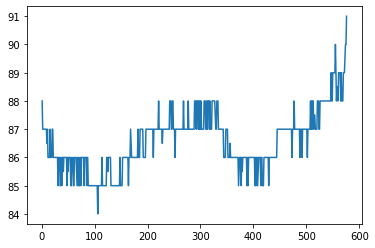

In [168]:


plt.plot(columns,t1median)
#plt.fill_between( t1median, y1=t1q1, y2=t1q3, color='gray', alpha=0.5)
'''
plt.set_ylabel('temperature [°C]')
plt.set_xlabel('measuring date')
plt.set_ylim([15,25])
'''
#ax.grid()
#plt.show()

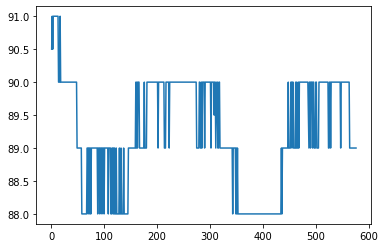

In [169]:
plt.plot(columns,t0median)
plt.show()

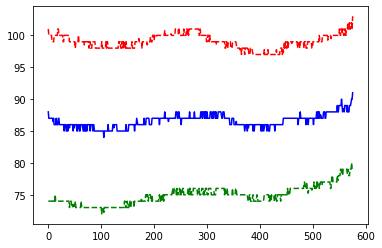

In [174]:
import numpy as np
import matplotlib.pyplot as plt 


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t1median,linestyle='-', color='blue')
ax.plot(t1q1,linestyle='--', color='green')
ax.plot(t1q3,linestyle='--', color='red')

z1 = np.array(t1q3)
z2 = np.array(t1q1)

#ax.fill_between(t1median,t1q1,t1q3,where=t1q1<t1q3,color='grey',alpha=0.5, interpolate=True)
#ax.fill_between(t1median,t1q3,t1q1,where=z1>=z2,color='grey',alpha=0.5, interpolate=True)
plt.show()  

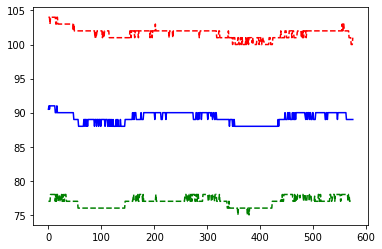

In [175]:
import numpy as np
import matplotlib.pyplot as plt 


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t0median,linestyle='-', color='blue')
ax.plot(t0q1,linestyle='--', color='green')
ax.plot(t0q3,linestyle='--', color='red')

z1 = np.array(t1q3)
z2 = np.array(t1q1)

#ax.fill_between(t1median,t1q1,t1q3,where=t1q1<t1q3,color='grey',alpha=0.5, interpolate=True)
#ax.fill_between(t1median,t1q3,t1q1,where=z1>=z2,color='grey',alpha=0.5, interpolate=True)
plt.show()  